In [44]:
from matplotlib import pyplot as plt
from algs.utils import * 
from algs.algorithms import *
from scipy.optimize import minimize, Bounds
import pandas as pd
import seaborn as sns

import numpy as np
%matplotlib inline

# Read A Matrix

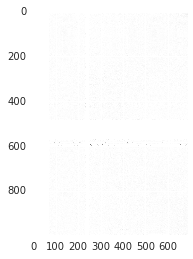

In [133]:
path = 'data/chr1_chr6.txt'
A = read_data(path, clean_nan = True)
# A = A[100:300, 100:300] # subset for now. 

m, n = A.shape

plt.imshow(A, interpolation = 'nearest')

In [141]:
k = 30

# LAS

In [142]:
res = LAS(A, k) # compute LAS
res['val']

6.8799254300000001

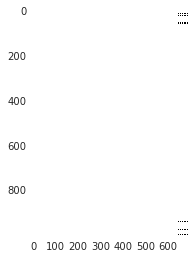

In [143]:
plt.imshow(inclusion_matrix(A, res['ix']), interpolation = 'nearest')

# LAS Experiments

In [127]:
k_max = np.int(np.min(A.shape)/2)
n_reps = 100
k_vals = np.arange(5, k_max)

In [128]:
df = pd.DataFrame({'k' : np.repeat(k_vals, n_reps)})
f = np.vectorize(lambda k: LAS(A, k)['val'])
df['v'] = f(df['k'])
agged = df.groupby('k').agg([np.mean, np.var]).reset_index()

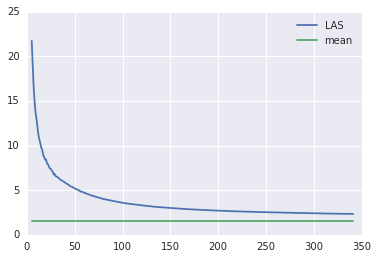

In [149]:
plt.plot(agged['k'], 
         agged['v']['mean'], 
         label = 'LAS')
plt.plot(agged['k'], 
         np.repeat(np.mean(A), len(agged['k'])), 
         label = 'mean')
plt.legend()

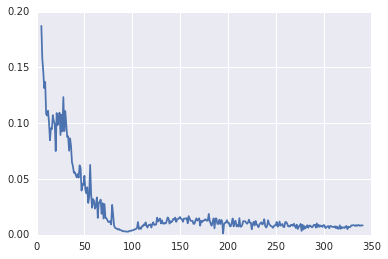

In [132]:
plt.plot(agged['k'], np.sqrt(agged['v']['var'])/agged['v']['mean'])

# IGP

In [89]:
res = IGP(A, k)
res['val'] # get the value (average)

2.2400738409222223

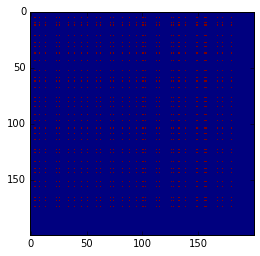

In [90]:
plt.imshow(inclusion_matrix(A, res['ix']), interpolation = 'nearest')

# SLSQP

In [103]:
z = continuous_SLSQP(A, k, print_obj = False)
z['val']

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -4.09017139279
            Iterations: 68
            Function evaluations: 67
            Gradient evaluations: 67


4.090172732488889

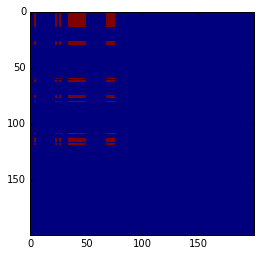

In [105]:
plt.imshow(np.outer(z['x'], z['y']), interpolation = 'nearest')